In [1]:
import numpy as np
import matplotlib.pyplot as plt 

## Question 2

In [2]:
def matrix_multiplication(A, B):
    """Computes the matrix multiplication of two matrices A and B.

    Args:
        A: A numpy array of shape (n, m).
        B: A numpy array of shape (m, p).

    Returns:
        A numpy array of shape (n, p), the result of multiplying A and B.
    """
    # The variable keeps track of the number of operations
    op_count = 0

    assert A.shape[1] == B.shape[0], "The two matrices must have compatible dimensions."
    
    C = np.zeros((A.shape[0], B.shape[1]))
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(A.shape[1]):
                C[i, j] += A[i, k] * B[k, j]
                # Here we have 1 mutiplication and 1 addition ie. 2 flops. So:
                op_count = op_count + 2

    return C, op_count


In [3]:
# Example usage:
n = 4

# Generate two random matrices.
A = np.random.randn(n, n)
B = np.random.randn(n, n)

C, flops = matrix_multiplication(A, B)
D = np.dot(A, B)
# Verify that the outputs are the same.
assert np.allclose(C, D)


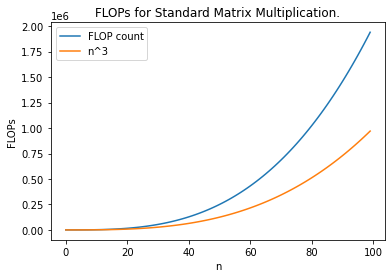

In [4]:
max_N = 10**2

flop_arr = [matrix_multiplication(np.random.randn(n, n),np.random.randn(n, n))[1] for n in range(max_N)]

n_cube = [n**3 for n in range(max_N)]

plt.plot(range(max_N), flop_arr, label="FLOP count")
plt.plot(range(max_N), np.array(n_cube), label=r"n^3") # multiply n_cube by 2 to see how they coincide
plt.xlabel("n")
plt.ylabel("FLOPs")
plt.title("FLOPs for Standard Matrix Multiplication.")
plt.legend()

## Question 3

In [5]:
def get_splits(M):
    """
        Splits the array into 4 quadrants
        Returns:
            M11, M12, M21, M22
    """
    # split the rows in half
    M1_, M2_ = np.vsplit(M,2)
    
    # splits the "splitted rows" into half across the column
    M11, M12 = np.hsplit(M1_,2)
    M21, M22 = np.hsplit(M2_,2)
    
    return M11, M12, M21, M22

def check_shape_info(A,B):
    """
        We check to see that both matrices are n x n.
        And we check that n = 2^k where k is some integer.
    """
    m, n = A.shape
    assert m == n, "matrix is not square"
    
    m, n = B.shape
    assert m == n, "matrix is not square"
    
    assert np.log2(n) - np.ceil(np.log2(n))  == 0, "matrix is not an  integer power of 2"
    
    return n

In [6]:
def strassen(A, B):
    """
    Multiplies two square matrices using Strassen's algorithm.

    Args:
        A: A square numpy array of shape (n, n) of complex numbers.
        B: A square numpy array of shape (n, n) of complex numbers.
        
    Returns:
        A square numpy array of shape (n, n) containing the product of A and B.
"""
    
    n = check_shape_info(A,B)
    
    # Base case.
    if n == 2:
        return np.dot(A, B)

    # Divide the matrices into four quadrants.
    A11, A12, A21, A22 = get_splits(A)
    B11, B12, B21, B22 = get_splits(B)

    # Recursively compute the seven Strassen subproblems.
    P1 = strassen(A11 + A22, B11 + B22)
    P2 = strassen(A21 + A22, B11)
    P3 = strassen(A11, B12 - B22)
    P4 = strassen(A22, B21 - B11)
    P5 = strassen(A11 + A12, B22)
    P6 = strassen(A21 - A11, B11 + B12)
    P7 = strassen(A12 - A22, B21 + B22)

    # Combine the subproblems to form the product matrix.
    C11 = P1 + P4 - P5 + P7
    C12 = P3 + P5
    C21 = P2 + P4
    C22 = P1 - P2 + P3 + P6

    return np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))



In [7]:
n = 2**8

# Generate two random complex matrices.
A = np.random.randn(n, n) + 1j * np.random.randn(n, n)
B = np.random.randn(n, n) + 1j * np.random.randn(n, n)

# Compute the product matrix using Strassen's algorithm.
C = strassen(A, B)

# Compute the product matrix using NumPy's built-in matrix multiplication function.
D = np.dot(A, B)

# Verify that the outputs are the same.
assert np.allclose(C, D)
print("Strassen's algorithm test passed successfully!")

Strassen's algorithm test passed successfully!
